###Importing modules and libraries:


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

Loading and copying dataset:

In [75]:
data=pd.read_csv('/content/covertype.csv')
df=data.copy()

###Data preprocessing and EDA:


In [76]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
df.shape

(581012, 55)

In [6]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Unnamed: 2,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0


In [11]:
new_columns={'Unnamed: 0':'Columnn1','Unnamed: 1':'Column2','Unnamed: 2':'Column3'}
df=df.rename(columns=new_columns)
df.columns

Index(['Columnn1', 'Column2', 'Column3', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dty

In [12]:
df.tail()

,Columnn1,Column2,Column3,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


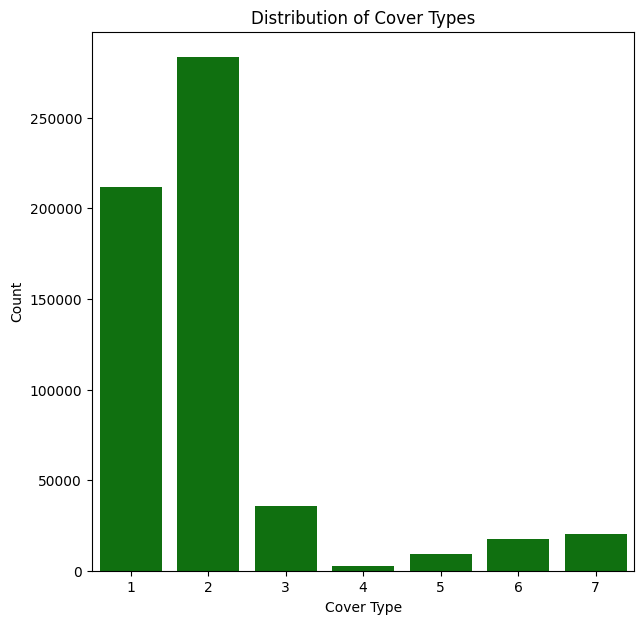

In [24]:
plt.figure(figsize=(7,7))
sns.countplot(x='Cover_Type',data=df,color='green')
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of Cover_types in Data')

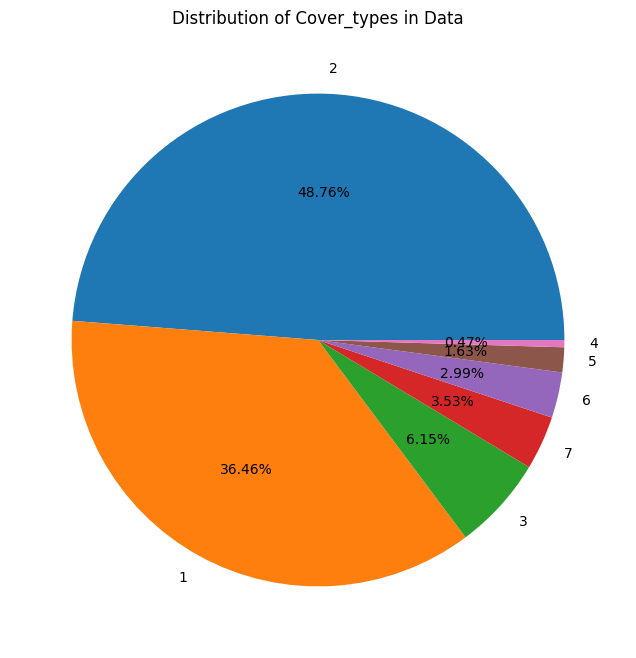

In [29]:
plt.figure(figsize=(8,8))
plt.pie(df['Cover_Type'].value_counts(),labels=df['Cover_Type'].value_counts().index,autopct='%1.2f%%')
plt.title('Distribution of Cover_types in Data')

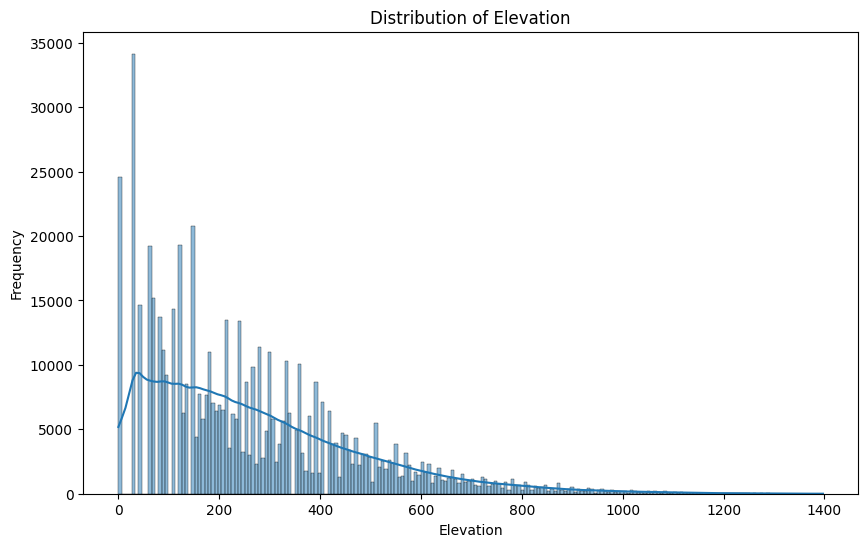

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Elevation'], kde=True)
plt.title('Distribution of Elevation')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.show()

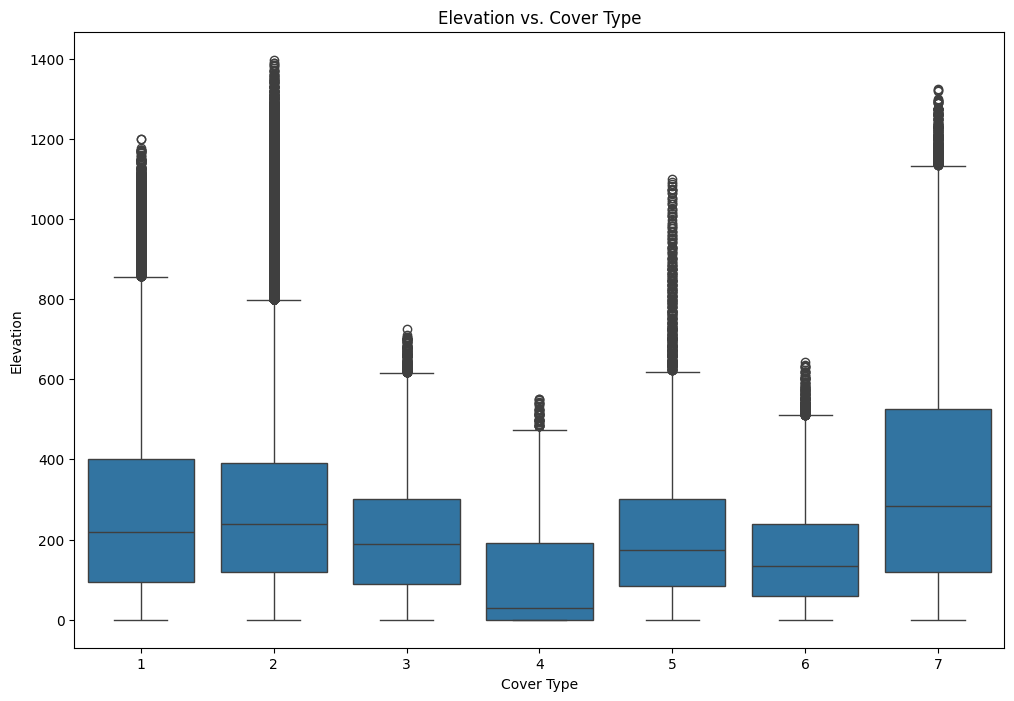

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation vs. Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

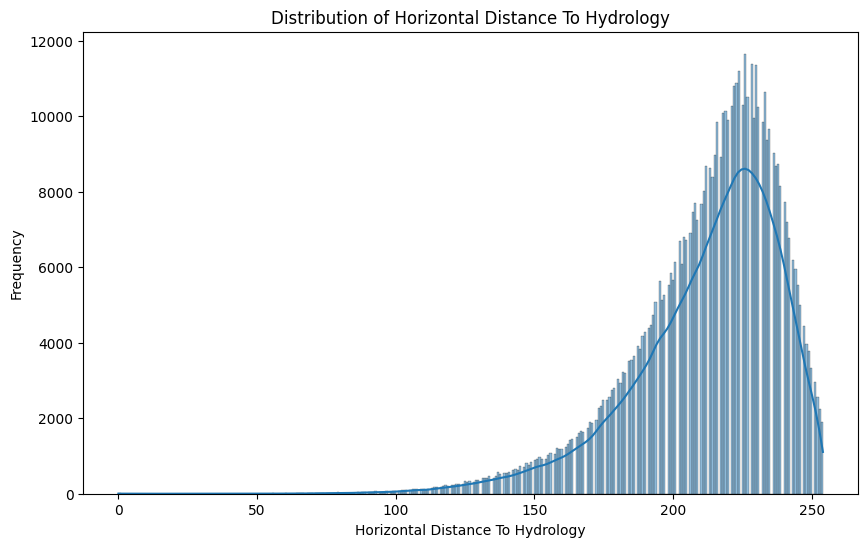

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Horizontal_Distance_To_Hydrology'], kde=True)
plt.title('Distribution of Horizontal Distance To Hydrology')
plt.xlabel('Horizontal Distance To Hydrology')
plt.ylabel('Frequency')
plt.show()

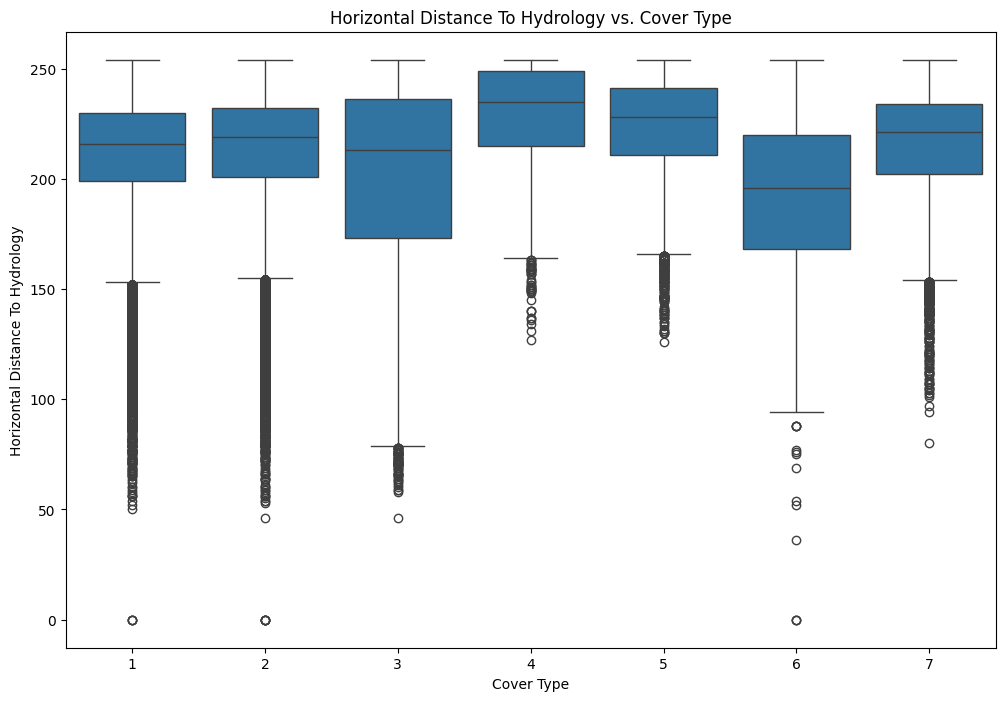

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df)
plt.title('Horizontal Distance To Hydrology vs. Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Horizontal Distance To Hydrology')
plt.show()

Assinging Features and labels:

In [77]:
X=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']

Data Splitting:


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
X_train.shape,X_test.shape

((464809, 54), (116203, 54))

Model selection:

In [79]:
dtModel=DecisionTreeClassifier(max_depth=20)
dtModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [80]:
y_predict_dt_train=dtModel.predict(X_train)
y_predict_dt_test=dtModel.predict(X_test)

Evaluation of Decision Tree classifier:

In [81]:
print('Train Data Evalution\n')
print('Accuracy: ',accuracy_score(y_train,y_predict_dt_train))
print('Precsion: ',precision_score(y_train,y_predict_dt_train,average='weighted'))
print('Confusion Matrix: \n',confusion_matrix(y_train,y_predict_dt_train))

Train Data Evalution

Accuracy:  0.9414469169056537
Precsion:  0.9416812908887088
Confusion Matrix: 
 [[157195  11885      2      0     59     45     97]
 [  7213 218464    248      0    442    401     33]
 [     0    766  26595     11      6   1255      0]
 [     0      1     70   2089      0     61      0]
 [    75   2291      3      0   5091     38      0]
 [    42    935    724      2      2  12173      0]
 [   490     19      0      0      0      0  15986]]


In [82]:
print('Test Data Evalution\n')
print('Accuracy: ',accuracy_score(y_test,y_predict_dt_test))
print('Precsion: ',precision_score(y_test,y_predict_dt_test,average='weighted'))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_predict_dt_test))

Test Data Evalution

Accuracy:  0.9058113818059774
Precsion:  0.905663161397775
Confusion Matrix: 
 [[37956  4359     1     0    36    10   195]
 [ 3096 52869   137     0   212   151    35]
 [    3   294  6247    50    10   517     0]
 [    0     1    82   417     0    26     0]
 [   46   705    15     0  1214    15     0]
 [    8   301   342    23     8  2807     0]
 [  242    25     0     0     0     0  3748]]


Diagram:

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

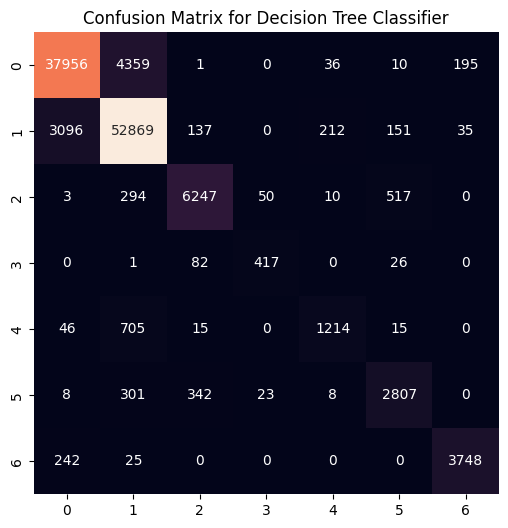

In [83]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_predict_dt_test),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')

Through Random Forest:

Data Splitting:

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((464809, 54), (116203, 54))

In [85]:
rfModel=RandomForestClassifier(n_estimators=150,random_state=42)
rfModel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [86]:
y_predict_rf_train=rfModel.predict(X_train)
y_predict_rf_test=rfModel.predict(X_test)

###Random forest Evaluation:

In [87]:
print('Train Data Evaluation\n')
print('Accuracy: ',accuracy_score(y_train,y_predict_rf_train))
print('Precsion: ',precision_score(y_train,y_predict_rf_train,average='weighted'))
print('Confusion Matrix: \n',confusion_matrix(y_train,y_predict_rf_train))


Train Data Evaluation

Accuracy:  1.0
Precsion:  1.0
Confusion Matrix: 
 [[169283      0      0      0      0      0      0]
 [     0 226801      0      0      0      0      0]
 [     0      0  28633      0      0      0      0]
 [     0      0      0   2221      0      0      0]
 [     0      0      0      0   7498      0      0]
 [     0      0      0      0      0  13878      0]
 [     0      0      0      0      0      0  16495]]


In [88]:
print('Test Data Evaluation\n')
print('Accuracy: ',accuracy_score(y_test,y_predict_rf_test))
print('Precsion: ',precision_score(y_test,y_predict_rf_test,average='weighted'))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_predict_rf_test))

Test Data Evaluation

Accuracy:  0.955784274072098
Precsion:  0.9558967441337508
Confusion Matrix: 
 [[40153  2296     0     0    11     2    95]
 [ 1194 55055    99     0    78    61    13]
 [    1    94  6882    21     5   118     0]
 [    0     0    64   445     0    17     0]
 [   29   393    17     0  1545    11     0]
 [    1    96   216    19     5  3152     0]
 [  158    24     0     0     0     0  3833]]


Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

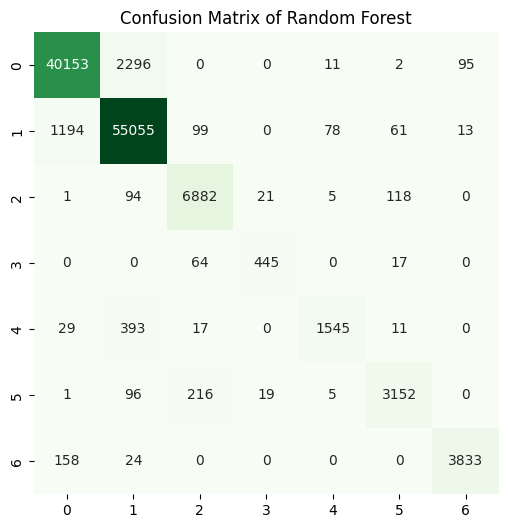

In [102]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_predict_rf_test),annot=True,fmt='d',cbar=False,cmap='Greens')
plt.title('Confusion Matrix of Random Forest')

XGBoost Classifier:

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((464809, 54), (116203, 54))

In [92]:
xgbModel=XGBClassifier(n_estimators=200,random_state=42)
xgbModel.fit(X_train,y_train - 1) # Subtract 1 to make classes zero-indexed

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [95]:
y_predict_xgb_train=xgbModel.predict(X_train)+1
y_predict_xgb_test=xgbModel.predict(X_test)+1

### XGBoost Evaluation:

In [96]:
print('Train Data Evaluation (XGBoost)\n')
print('Accuracy: ', accuracy_score(y_train, y_predict_xgb_train))
print('Precision: ', precision_score(y_train, y_predict_xgb_train, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_train, y_predict_xgb_train))

Train Data Evaluation (XGBoost)

Accuracy:  0.9253908594713097
Precision:  0.9255015873010061
Confusion Matrix: 
 [[151277  17707      2      0     59      5    233]
 [ 12541 213336    379      0    280    227     38]
 [     1    376  27730      8      3    515      0]
 [     0      0      2   2219      0      0      0]
 [    38   1049     69      0   6331     11      0]
 [     4    238    512      5      4  13115      0]
 [   358     14      0      0      1      0  16122]]


In [97]:



print('Test Data Evaluation (XGBoost)\n')
print('Accuracy: ', accuracy_score(y_test, y_predict_xgb_test))
print('Precision: ', precision_score(y_test, y_predict_xgb_test, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_predict_xgb_test))

Test Data Evaluation (XGBoost)

Accuracy:  0.9109575484281817
Precision:  0.9110346012214287
Confusion Matrix: 
 [[37555  4836     0     0    24     3   139]
 [ 3502 52635   119     0   122    99    23]
 [    1   138  6740    26     2   214     0]
 [    0     0    51   455     0    20     0]
 [   29   418    26     0  1514     8     0]
 [    0   117   223    14     2  3133     0]
 [  170    20     0     0     1     0  3824]]


### Confusion Matrix for XGBoost Classifier:

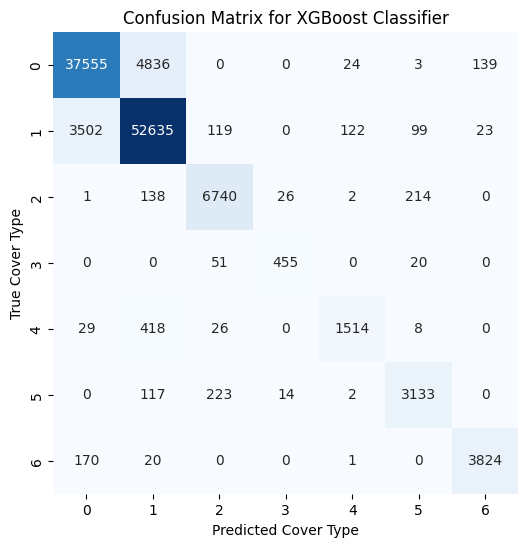

In [99]:
# Visualize the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_predict_xgb_test), annot=True, fmt='d', cbar=False,cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Cover Type')
plt.ylabel('True Cover Type')
plt.show()

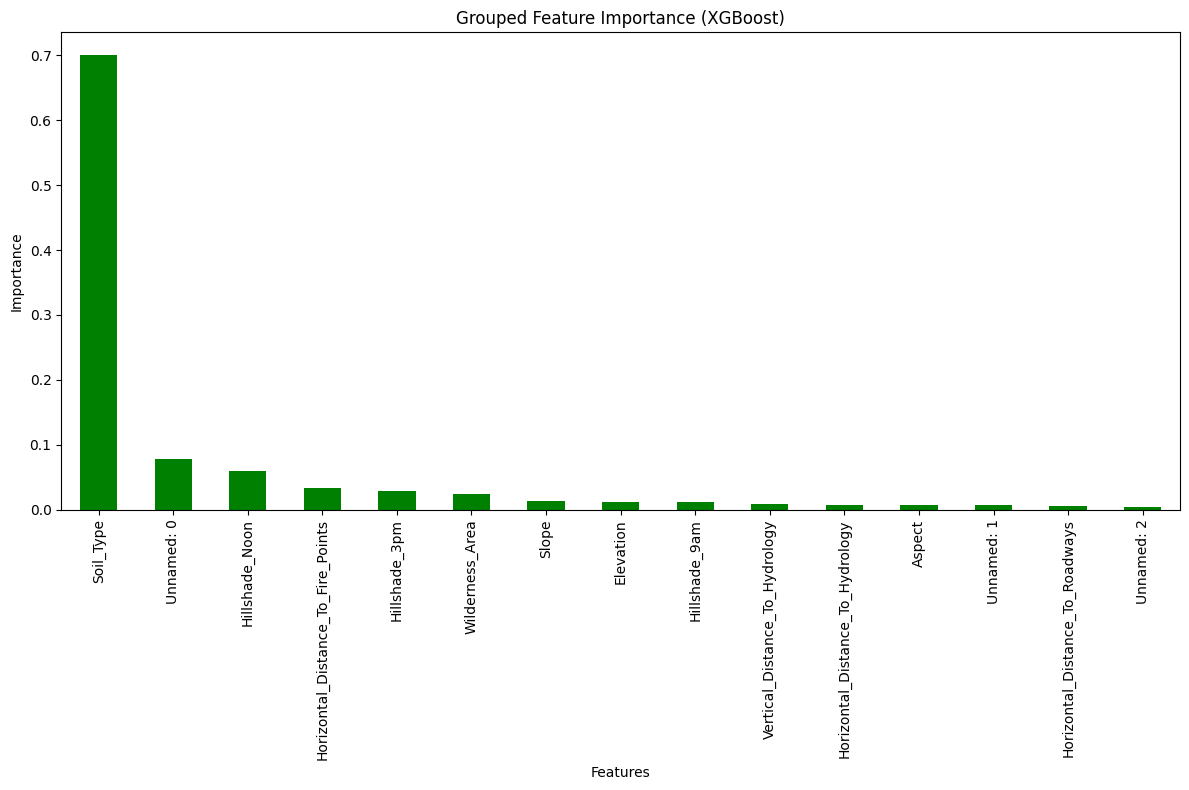

In [108]:

xgb_feature_importance = pd.Series(xgbModel.feature_importances_, index=X_train.columns)


sorted_xgb_feature_importance = xgb_feature_importance.sort_values(ascending=False)


xgb_soil_type_importance = xgb_feature_importance[xgb_feature_importance.index.str.startswith('Soil_Type')].sum()


xgb_wilderness_area_importance = xgb_feature_importance[xgb_feature_importance.index.str.startswith('Wilderness_Area')].sum()

grouped_xgb_importance = sorted_xgb_feature_importance[~sorted_xgb_feature_importance.index.str.startswith(('Soil_Type', 'Wilderness_Area'))].copy() # Use .copy() to avoid SettingWithCopyWarning

grouped_xgb_importance['Soil_Type'] = xgb_soil_type_importance
grouped_xgb_importance['Wilderness_Area'] = xgb_wilderness_area_importance


grouped_xgb_importance = grouped_xgb_importance.sort_values(ascending=False)


plt.figure(figsize=(12, 8))
grouped_xgb_importance.plot(kind='bar',color='green')
plt.title('Grouped Feature Importance (XGBoost)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()